<a href="https://colab.research.google.com/github/0ace-jk/atividades_ebac/blob/main/mod06_Tarefa_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/SINASC_RO_2019.csv')

In [3]:
print(df.shape)
df.APGAR5.value_counts(dropna=False)

(27028, 69)


,count
APGAR5,
9.0,16076
10.0,8393
8.0,1994
7.0,241
NaN,103
6.0,79
5.0,45
1.0,24
4.0,23


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [4]:
print(f"Valores únicos de APGAR5: {df['APGAR5'].unique()}")

Valores únicos de APGAR5: [10.  9.  7.  0.  8.  4.  3.  6.  5. nan  2.  1.]


In [5]:
# Criação da nova coluna para o df
bins = [-float('inf'), 3, 5, 7, 10]
labels = ['asfixia grave', 'asfixia moderada', 'asfixia leve', 'normal']
df['APGAR5_CATEGORIA'] = pd.cut(df['APGAR5'], bins=bins, labels=labels, right=True)

In [6]:
print("\nDistribuição da variável APGAR5_CATEGORIA:")
print(df['APGAR5_CATEGORIA'].value_counts(dropna=False))


Distribuição da variável APGAR5_CATEGORIA:
APGAR5_CATEGORIA
normal              26463
asfixia leve          320
NaN                   103
asfixia grave          74
asfixia moderada       68
Name: count, dtype: int64


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

In [7]:
df_plot = df.dropna(subset=["GESTACAO", "SEXO", "APGAR5_CATEGORIA"])

In [8]:
ordem_gestacao = [
    "Menos de 22 semanas",
    "22 a 27 semanas",
    "28 a 31 semanas",
    "32 a 36 semanas",
    "37 a 41 semanas",
    "42 semanas e mais",
    "Ignorado"
]
df_plot["GESTACAO"] = pd.Categorical(df_plot["GESTACAO"], categories=ordem_gestacao, ordered=True)

/tmp/ipython-input-8-965382429.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot["GESTACAO"] = pd.Categorical(df_plot["GESTACAO"], categories=ordem_gestacao, ordered=True)


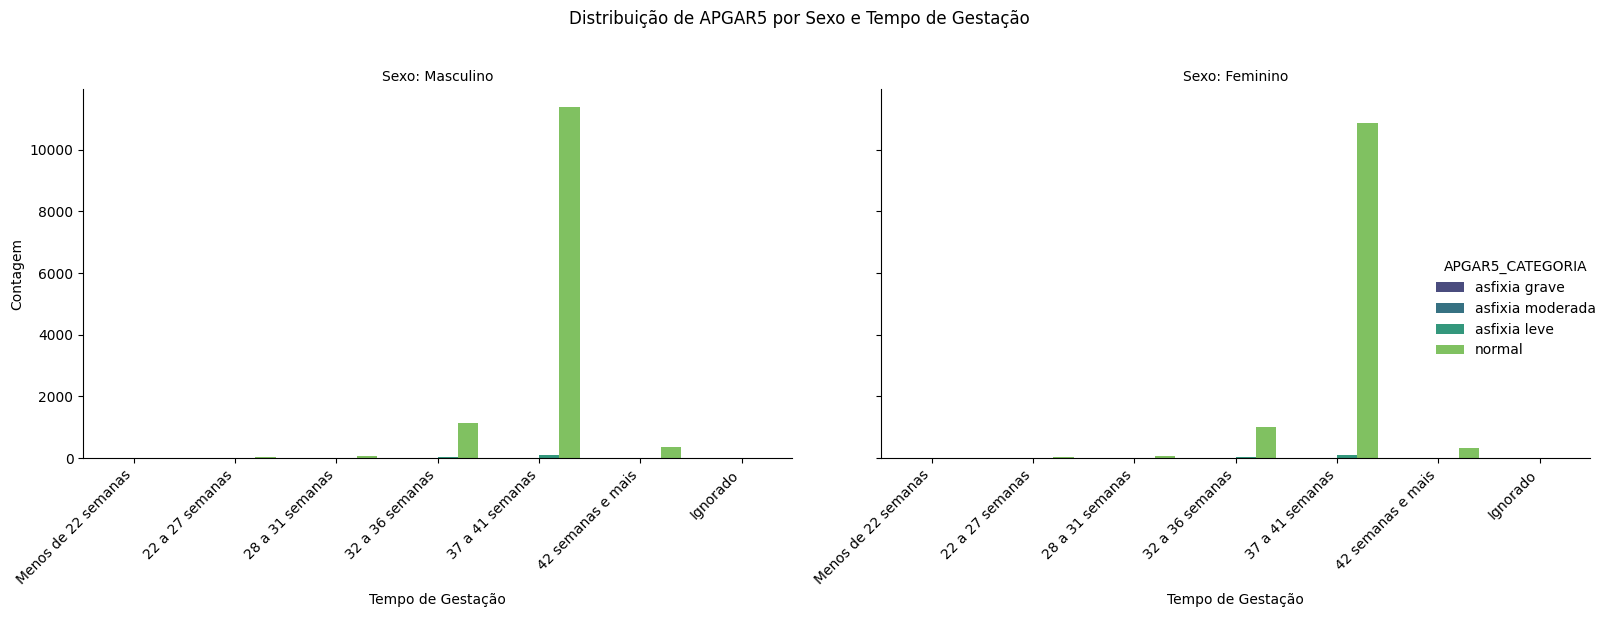

In [9]:
g = sns.catplot(
    data=df_plot,
    x="GESTACAO",
    hue="APGAR5_CATEGORIA",
    col="SEXO",
    kind="count",
    palette="viridis",
    col_wrap=2, # Para organizar os subplots
    height=6, aspect=1.2 # Ajustar tamanho dos subplots
)

g.set_axis_labels("Tempo de Gestação", "Contagem")
g.set_titles("Sexo: {col_name}")
g.set_xticklabels(rotation=45, ha="right")
plt.suptitle("Distribuição de APGAR5 por Sexo e Tempo de Gestação", y=1.02) # Título geral
plt.tight_layout()
plt.show()

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [10]:
tabela_cruzada_apgar5_gestacao = pd.crosstab(df["GESTACAO"], df["APGAR5_CATEGORIA"])
print("\nTabela Cruzada: GESTACAO x APGAR5_CATEGORIA")
print(tabela_cruzada_apgar5_gestacao)


Tabela Cruzada: GESTACAO x APGAR5_CATEGORIA
APGAR5_CATEGORIA     asfixia grave  asfixia moderada  asfixia leve  normal
GESTACAO                                                                  
22 a 27 semanas                 21                 1            12      51
28 a 31 semanas                  3                12            18     129
32 a 36 semanas                  8                19            73    2134
37 a 41 semanas                 33                28           196   22266
42 semanas e mais                1                 1             6     690
Menos de 22 semanas              2                 0             1       4


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [11]:
percentuais_linha = (tabela_cruzada_apgar5_gestacao.div(tabela_cruzada_apgar5_gestacao.sum(axis=1), axis=0) * 100).round(4)
print("\nPercentuais de Linha (APGAR5 por GESTACAO):")
print(percentuais_linha)


Percentuais de Linha (APGAR5 por GESTACAO):
APGAR5_CATEGORIA     asfixia grave  asfixia moderada  asfixia leve   normal
GESTACAO                                                                   
22 a 27 semanas            24.7059            1.1765       14.1176  60.0000
28 a 31 semanas             1.8519            7.4074       11.1111  79.6296
32 a 36 semanas             0.3581            0.8505        3.2677  95.5237
37 a 41 semanas             0.1465            0.1243        0.8702  98.8589
42 semanas e mais           0.1433            0.1433        0.8596  98.8539
Menos de 22 semanas        28.5714            0.0000       14.2857  57.1429


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

In [12]:
percentuais_linha = percentuais_linha.reindex(ordem_gestacao)

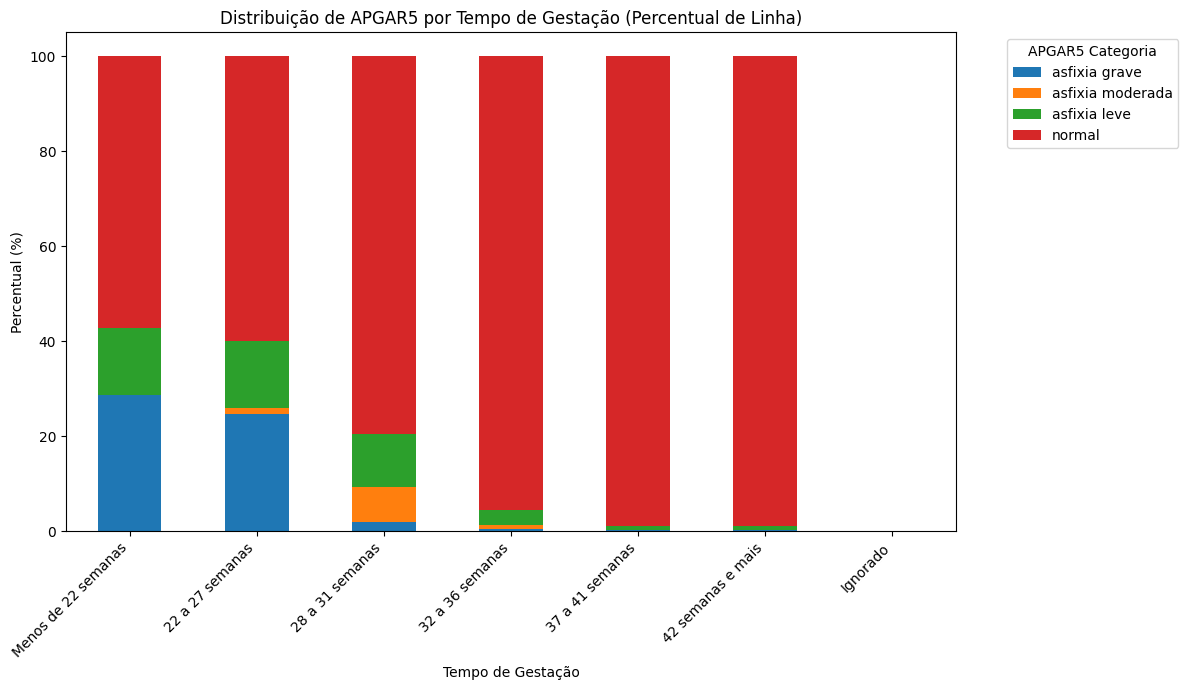

In [13]:
ax = percentuais_linha.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title("Distribuição de APGAR5 por Tempo de Gestação (Percentual de Linha)")
plt.xlabel("Tempo de Gestação")
plt.ylabel("Percentual (%)")
plt.xticks(rotation=45, ha='right')
plt.legend(title='APGAR5 Categoria', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [14]:
gestacoes_prematuras = percentuais_linha.loc[[
    "Menos de 22 semanas",
    "22 a 27 semanas",
    "28 a 31 semanas",
    "32 a 36 semanas"
]]

percentual_asfixia_prematuras = gestacoes_prematuras[[
    "asfixia grave",
    "asfixia moderada",
    "asfixia leve"
]].sum(axis=1)

print("\nPercentual de asfixia (grave, moderada, leve) em gestações prematuras:")
print(percentual_asfixia_prematuras)


gestacoes_normais = percentuais_linha.loc[[
    "37 a 41 semanas",
    "42 semanas e mais"
]]

percentual_asfixia_normais = gestacoes_normais[[
    "asfixia grave",
    "asfixia moderada",
    "asfixia leve"
]].sum(axis=1)

print("\nPercentual de asfixia (grave, moderada, leve) em gestações normais:")
print(percentual_asfixia_normais)


Percentual de asfixia (grave, moderada, leve) em gestações prematuras:
GESTACAO
Menos de 22 semanas    42.8571
22 a 27 semanas        40.0000
28 a 31 semanas        20.3704
32 a 36 semanas         4.4763
dtype: float64

Percentual de asfixia (grave, moderada, leve) em gestações normais:
GESTACAO
37 a 41 semanas      1.1410
42 semanas e mais    1.1462
dtype: float64


A análise do gráfico de barras dos percentuais de APGAR5 por tempo de gestação sugere que a afirmação dos médicos de que partos com menos de 37 semanas são prematuros e podem estar associados a maiores riscos de asfixia concorda com os dados.
Observa-se que as gestações com menos de 37 semanas apresentam percentuais significativamente mais altos de asfixia (grave, moderada e leve) em comparação com as gestações "normais". Isso é evidenciado pela maior proporção das barras coloridas (não-normal) nas categorias de gestação mais curtas. Por exemplo, 'Menos de 22 semanas' e '22 a 27 semanas' mostram uma proporção considerável de asfixia grave e moderada, enquanto mais de 37 semanas são predominantemente 'normal'.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

In [15]:
df_plot_peso = df.dropna(subset=["APGAR5_CATEGORIA", "PESO"])

/tmp/ipython-input-16-4074774418.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot_peso["APGAR5_CATEGORIA"] = pd.Categorical(df_plot_peso["APGAR5_CATEGORIA"], categories=ordem_apgar5, ordered=True)
/tmp/ipython-input-16-4074774418.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_plot_peso, x="APGAR5_CATEGORIA", y="PESO", palette="viridis")


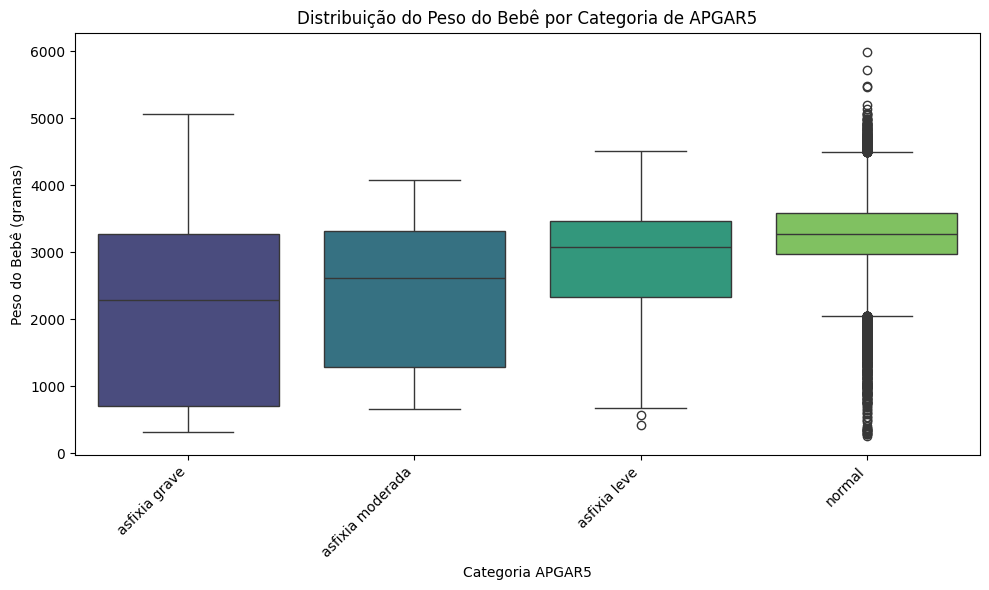

In [16]:
ordem_apgar5 = ["asfixia grave", "asfixia moderada", "asfixia leve", "normal"]
df_plot_peso["APGAR5_CATEGORIA"] = pd.Categorical(df_plot_peso["APGAR5_CATEGORIA"], categories=ordem_apgar5, ordered=True)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_plot_peso, x="APGAR5_CATEGORIA", y="PESO", palette="viridis")
plt.title("Distribuição do Peso do Bebê por Categoria de APGAR5")
plt.xlabel("Categoria APGAR5")
plt.ylabel("Peso do Bebê (gramas)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

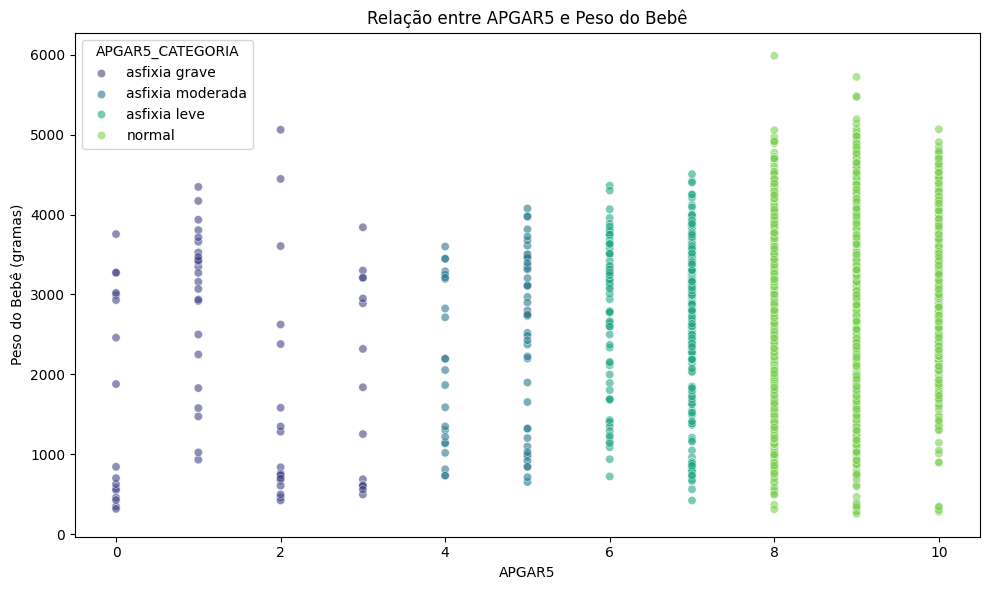

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_plot_peso, x="APGAR5", y="PESO", hue="APGAR5_CATEGORIA", palette="viridis", alpha=0.6)
plt.title("Relação entre APGAR5 e Peso do Bebê")
plt.xlabel("APGAR5")
plt.ylabel("Peso do Bebê (gramas)")
plt.tight_layout()
plt.show()

A análise dos gráficos (boxplot e scatterplot) sugere que existe uma relação entre o APGAR5 e o peso do bebê. Bebês com categorias de APGAR5 mais baixas (asfixia grave, moderada, leve) tendem a apresentar uma distribuição de peso menor em comparação com bebês na categoria 'normal'. O boxplot de 'Peso do Bebê por Categoria de APGAR5' ilustra claramente que a mediana e a dispersão dos pesos são menores para as categorias de asfixia.